<a href="https://colab.research.google.com/github/salimunlu/pytorch_projects/blob/main/CNN_for_Handwritten_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:
# 1. Veri setini yükleme
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.9MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 503kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.54MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.81MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# 2. Model tanımlama
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleNN()

In [ ]:
# 3. Kayıp fonksiyonu ve optimizasyon
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# 4. Eğitim döngüsü
epochs = 5
for epoch in range(epochs):
    model.train()
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 1/5, Loss: 0.3884
Epoch 2/5, Loss: 0.2340
Epoch 3/5, Loss: 0.0255
Epoch 4/5, Loss: 0.0683
Epoch 5/5, Loss: 0.0645


In [ ]:
# 5. Test ve değerlendirme
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 96.91%


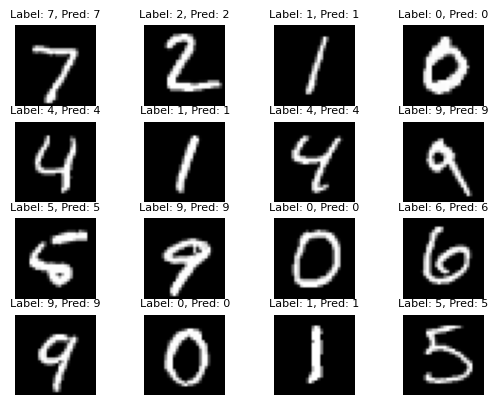

In [ ]:
# 6. Görselleştirme (isteğe bağlı)
import matplotlib.pyplot as plt
import numpy as np

images, labels = next(iter(test_loader))
outputs = model(images)
_, preds = torch.max(outputs, 1)

# İlk 6 örneği çizelim
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f"Label: {labels[i]}, Pred: {preds[i]}", fontsize=8)
    plt.axis('off')
plt.show()

In [ ]:
# 2. CNN modelini tanımlama
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # 1 input channel, 32 output channels
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1) # 64 output channels
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling layer
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Fully connected layer
        self.fc2 = nn.Linear(128, 10)  # 10 output classes for digits 0-9

    def forward(self, x):
        x = torch.relu(self.conv1(x))  # Convolutional layer 1 + ReLU
        x = self.pool(x)  # Max pooling
        x = torch.relu(self.conv2(x))  # Convolutional layer 2 + ReLU
        x = self.pool(x)  # Max pooling
        x = x.view(-1, 64 * 7 * 7)  # Flatten the tensor
        x = torch.relu(self.fc1(x))  # Fully connected layer 1 + ReLU
        x = self.fc2(x)  # Fully connected layer 2 (output layer)
        return x

model = CNN()

# 3. Kayıp fonksiyonu ve optimizasyon
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Eğitim döngüsü
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

Epoch 1/5, Loss: 0.1548
Epoch 2/5, Loss: 0.0457
Epoch 3/5, Loss: 0.0314
Epoch 4/5, Loss: 0.0221
Epoch 5/5, Loss: 0.0190


In [ ]:
# 5. Test ve değerlendirme
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 99.03%


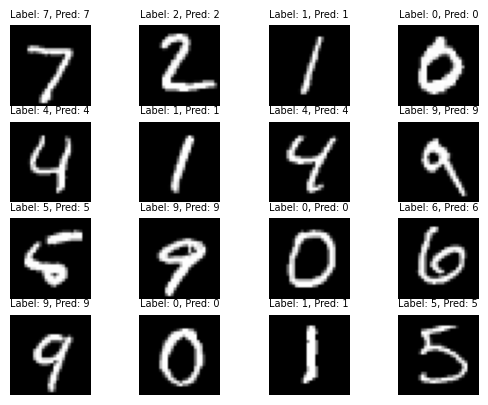

In [ ]:
# 6. Görselleştirme (isteğe bağlı)
import matplotlib.pyplot as plt

images, labels = next(iter(test_loader))
outputs = model(images)
_, preds = torch.max(outputs, 1)

# İlk 6 örneği çizelim
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f"Label: {labels[i]}, Pred: {preds[i]}", fontsize=7)
    plt.axis('off')
plt.show()